# Importing

In [1]:
import matplotlib.colors as colors
import pylab
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import math
import os
import scipy.special as sp
import scipy.integrate as integrate
import scipy.misc as ms
from matplotlib import gridspec
from numpy import linalg as LA
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, mark_inset)
import warnings
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colorbar import Colorbar
from matplotlib.colors import LogNorm
from matplotlib.colors import TwoSlopeNorm
import matplotlib as mpl
from PIL import Image
from scipy.stats import circmean
from scipy.stats import circstd
from scipy import stats

/tmp/ipykernel_660165/162563480.py:11: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  import scipy.misc as ms


In [2]:
import matplotlib as mpl

pgf_with_latex = {                      # setup matplotlib to use LaTeX for output
    #"pgf.texsystem": "pdflatex",        # change this if using xetex or lualatex
    #"text.usetex": True,                # use LaTeX to write all text
    #"font.family": "serif",
    #"font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    #"font.sans-serif": [],
    #"font.monospace": [],
    "axes.labelsize": 18,               # LaTeX default is 10pt font.
    #"text.fontsize": 18,
    "legend.fontsize": 15,              # Make the legend/label fonts a little smaller
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
    "pgf.preamble": "\n".join([
        r"\usepackage{bm}",  
        r"\usepackage[utf8]{inputenc}",    # use utf8 fonts because your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        r"\usepackage{amsmath}"
    ])
}

mpl.rcParams.update(pgf_with_latex)

In [3]:
def angle_differences(angles1, angles2):
    """
    Calculate the differences between corresponding angles in two arrays.

    Args:
    angles1 (array-like): First array of angles in radians.
    angles2 (array-like): Second array of angles in radians (must have the same length as angles1).

    Returns:
    np.ndarray: An array of differences between corresponding angles in the range -π to π.
    """
    complex1 = np.exp(1j * angles1)
    
    complex2 = np.exp(1j * angles2)
    diff_complex = complex1 / complex2
    return np.angle(diff_complex)

In [4]:
def rotation_rate1(filename):
    time, POP, NOP, angle = np.loadtxt(filename, unpack = True)  # Load the data from the text file
    index = np.argmax(NOP > 0.7)
    angle_diffs = np.zeros(0)
    time_diffs = np.zeros(0)
    new_angle = np.zeros(0)
    time_rescale = 15.5
    new_time = np.zeros(0)
    diff = 4

    if NOP[index] > 0.7:
        k = index
        for j in range(len(time)-index-diff):
            diff_time = (time[k+diff] - time[k])/time_rescale
            diff_angle = angle_differences(angle[k+diff],angle[k])
            
            new_time = np.append(new_time,time[k+diff]/time_rescale)
            new_angle = np.append(new_angle,angle[k+diff])
            angle_diffs = np.append(angle_diffs, diff_angle)
            time_diffs = np.append(time_diffs,diff_time)
            k += 1
        angular_velocity = angle_diffs / (time_diffs)
        return  new_time, new_angle, angular_velocity
    else:
        return -1

def remove_outliers_zscore(angular_velocity, time, threshold=2):
    z_scores = np.abs(stats.zscore(angular_velocity))
    non_outliers = np.where(z_scores <= threshold)[0]
    return time[non_outliers], angular_velocity[non_outliers]

In [ ]:
!cd Data

# Fig S13D

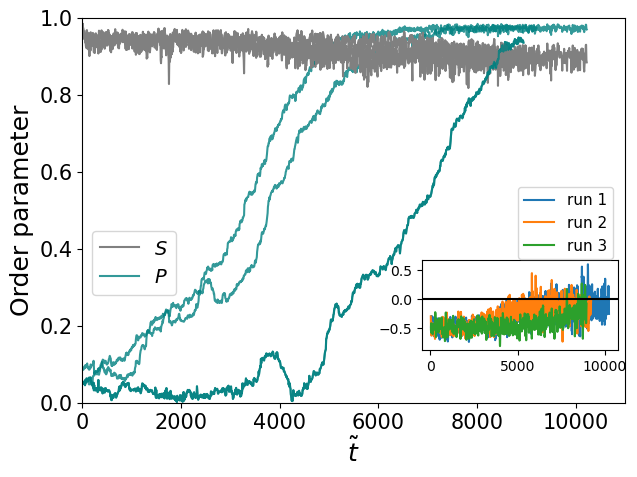

In [5]:

colors = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728', '#9467bd', '#8c564b', '#e377c2',
 '#7f7f7f', '#bcbd22', '#17becf']

kappa = ["30"]
time_rescale = 15.5
fig, (ax1) = plt.subplots(1, figsize=(7,5))
left, bottom, width, height = [0.61, 0.215, 0.28, 0.18]
ax2 = fig.add_axes([left, bottom, width, height])

for i in range(len(kappa)):
    write = "Ckappa_vtan003_B03_" +kappa[i]+ "Case0"
    time, POP, NOP, angle = np.loadtxt(write, unpack = True)

    for j in range(0,3):
        write = "Ckappa_vtan003_B03_" +kappa[i] + "Case" + str(j)
        time, POP, NOP, angle = np.loadtxt(write, unpack = True)
   
        POP = np.delete(POP, 0)
        NOP = np.delete(NOP, 0)
        angle = np.delete(angle, 0)
        time = np.delete(time, 0)
        time1, angle1, angular_velocity = rotation_rate1(write)
        time2, cleaned_rates = remove_outliers_zscore(angular_velocity, time1)
        ax1.plot(time/time_rescale, POP, color = 'teal', alpha=0.8)
        ax2.plot(time2, np.degrees(cleaned_rates), color = colors[j],label = 'run %s'%( j +1))
        ax1.plot(time/time_rescale, NOP, color = 'grey')
        
    
    ax1.plot(time/time_rescale, NOP, color = 'grey',label = r"$S$")
    ax1.plot(time/time_rescale, POP, color = 'teal', alpha=0.8, label = r"$P$")
   
    

ax1.set_xlim([0,11000])
ax1.set_ylim([0,1])
ax1.set_ylabel("Order parameter")
ax1.set_xlabel(r"$\tilde{t}$")
ax2.axhline(y=0.0, color='black', linestyle='-')
ax2.legend(fontsize = 8)
ax2.xaxis.set_tick_params(labelsize=10)
ax2.yaxis.set_tick_params(labelsize=10)
ax1.legend(loc = 2, fontsize = 14,bbox_to_anchor=(0.0, 0.47))
ax2.legend(loc = 2, fontsize = 11, bbox_to_anchor=(0.45, 1.9))

# Fig S13B

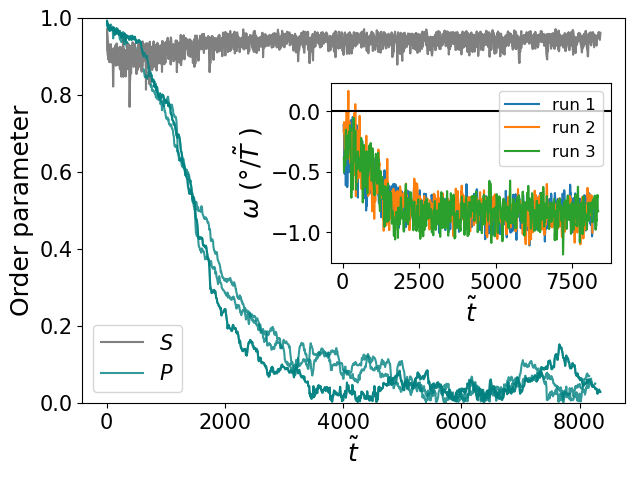

In [6]:

colors = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728', '#9467bd', '#8c564b', '#e377c2',
 '#7f7f7f', '#bcbd22', '#17becf']

kappa = ["PS_B03_30"]
time_rescale = 15.5
fig, (ax1) = plt.subplots(1, figsize=(7,5))
left, bottom, width, height = [0.48, 0.39, 0.4, 0.36]
ax2 = fig.add_axes([left, bottom, width, height])

for i in range(len(kappa)):
    write = "Ckappa" +kappa[i]+ "Case0"
    time, POP, NOP, angle = np.loadtxt(write, unpack = True)

    for j in range(0,3):
        write = "Ckappa" +kappa[i] + "Case" + str(j)
        time, POP, NOP, angle = np.loadtxt(write, unpack = True)
   
        POP = np.delete(POP, 0)
        NOP = np.delete(NOP, 0)
        angle = np.delete(angle, 0)
        time = np.delete(time, 0)
        time1, angle1, angular_velocity = rotation_rate1(write)
        time2, cleaned_rates = remove_outliers_zscore(angular_velocity, time1)
        ax1.plot(time/time_rescale, POP, color = 'teal', alpha=0.8)
        ax2.plot(time2, np.degrees(cleaned_rates), color = colors[j],label = 'run %s'%( j +1))
        ax1.plot(time/time_rescale, NOP, color = 'grey')
        
    
    ax1.plot(time/time_rescale, NOP, color = 'grey',label = r"$S$")
    ax1.plot(time/time_rescale, POP, color = 'teal', alpha=0.8, label = r"$P$")
   
    
ax1.set_ylim([0,1])
ax1.set_ylabel("Order parameter")
ax1.set_xlabel(r"$\tilde{t}$")

ax2.set_xlabel(r"$\tilde{t}$")
ax2.set_ylabel(r"$ \omega$ $(\degree/ \tilde{T}$ )")

ax2.axhline(y=0.0, color='black', linestyle='-')
ax1.legend(loc = 3)
ax2.legend(fontsize = 12)
# plt.savefig('PS_03_30', dpi=300,bbox_inches = "tight")

# Fig S14C

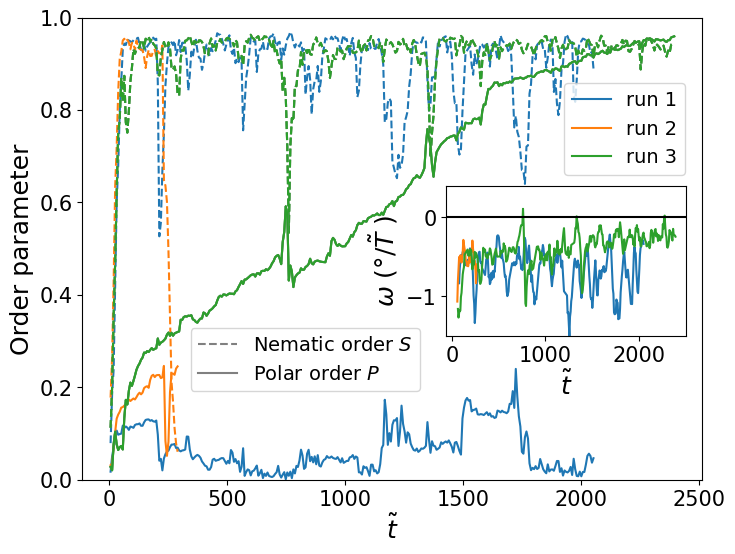

In [10]:

colors = ['#d62728', '#9467bd','#8c564b', '#1f77b4', '#ff7f0e', '#2ca02c', '#e377c2',
 '#7f7f7f', '#bcbd22', '#17becf']

kappa = ["_B09_30"]
time_rescale = 15.5
fig, (ax1) = plt.subplots(1, figsize=(8,6))
left, bottom, width, height = [0.58, 0.35, 0.3, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])
for i in range(len(kappa)):
    write = "Ckappa" +kappa[i]+ "Case3"
    time, POP, NOP, angle = np.loadtxt(write, unpack = True)
    
    for j in range(3,6):
        write = "Ckappa" +kappa[i] + "Case" + str(j)
        time, POP, NOP, angle = np.loadtxt(write, unpack = True)
    
        POP = np.delete(POP, 0)
        NOP = np.delete(NOP, 0)
        angle = np.delete(angle, 0)
        time = np.delete(time, 0)
        time1, angle1, angular_velocity = rotation_rate1(write)
        time2, cleaned_rates = remove_outliers_zscore(angular_velocity, time1)
        ax1.plot(time/time_rescale, POP,color = colors[j])
        ax2.plot(time2, np.degrees(cleaned_rates), color = colors[j], label = 'run %s'%( j - 2))
        ax1.plot(time/time_rescale, NOP,'--',color = colors[j])
        
        

    ax1.plot(time/time_rescale, NOP,'--',color = 'grey', label = r"Nematic order $S$")
    ax1.plot(time/time_rescale, NOP,'--',color = colors[j])
    ax1.plot(time/time_rescale, POP,color = 'grey', label = r"Polar order $P$")
    ax1.plot(time/time_rescale, POP,color = colors[j])
    

ax1.set_ylim([0,1])
ax2.set_ylim([-1.5,0.4])
ax1.set_ylabel("Order parameter")
ax1.set_xlabel(r"$\tilde{t}$")
ax2.set_ylabel(r"$\omega $ $(\degree/ \tilde{T}$ )")
ax2.set_xlabel(r"$\tilde{t}$")
ax1.legend(loc = 5, fontsize = 14,bbox_to_anchor=(0.56, 0.26))
ax2.legend(loc = 2, fontsize = 14, bbox_to_anchor=(0.45, 1.75))
ax2.axhline(y=0.0, color='black', linestyle='-')
# plt.savefig('IS_09_30', dpi=300,bbox_inches = "tight")

# Fig S13E

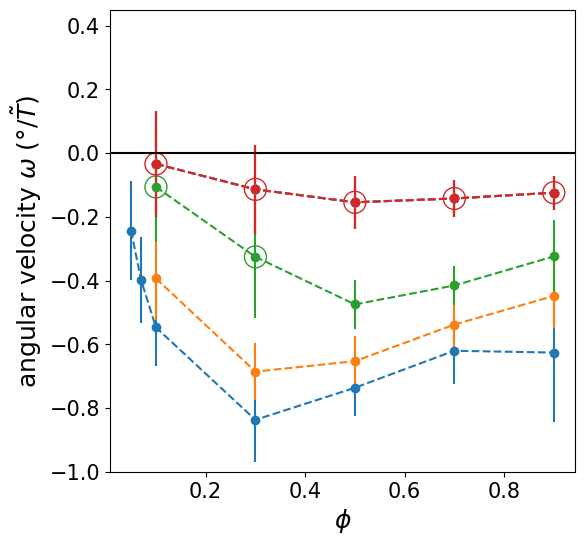

In [21]:
# === Helper function ===

def compute_rotation_stats(kappa_labels, prefix="", suffix="30Case", num_runs=3):
    """
    Computes mean and std angular velocity for each value in kappa_labels.

    Parameters:
        kappa_labels (list of str): list of strings to complete file names
        prefix (str): prefix before each kappa label (e.g., "Ckappa_" or "Ckappa_vtan005_")
        suffix (str): suffix after each kappa label, before run number (e.g., "30Case")
        num_runs (int): number of runs per configuration

    Returns:
        mean_rates (np.ndarray): average angular velocity (radians/time)
        std_rates (np.ndarray): standard deviation of angular velocity
    """
    mean_rates = []
    std_rates = []

    for label in kappa_labels:
        rate_of_rotation = np.zeros(0)
        for run in range(num_runs):
            filename = f"{prefix}{label}{suffix}{run}"
            time, angle, angular_velocity = rotation_rate1(filename)
            time, cleaned_rates = remove_outliers_zscore(angular_velocity, time)
            rate_of_rotation = np.append(rate_of_rotation, cleaned_rates)

        mean_rates.append(np.mean(rate_of_rotation))
        std_rates.append(np.std(rate_of_rotation))

    return np.array(mean_rates), np.array(std_rates)

# === Input Data ===

kappa_full = [0.05, 0.07, 0.1, 0.3, 0.5, 0.7, 0.9]
kappa_alpha = [0.1, 0.3, 0.5, 0.7, 0.9]

kappa_plot3 = ["B005_", "B007_", "B01_", "B03_", "B05_", "B07_", "B09_"]
kappa_plot_005 = ["_vtan005_B01_", "_vtan005_B03_", "_vtan005_B05_", "_vtan005_B07_", "_vtan005_B09_"]
kappa_plot_003 = ["_vtan003_B01_", "_vtan003_B03_", "_vtan003_B05_", "_vtan003_B07_", "_vtan003_B09_"]
kappa_plot_001 = ["_vtan001_B01_", "_vtan001_B03_", "_vtan001_B05_", "_vtan001_B07_", "_vtan001_B09_"]

# === Compute values ===

rate_array3, std_array3 = compute_rotation_stats(kappa_plot3, prefix="Ckappa_")
rate_array_005, std_array_005 = compute_rotation_stats(kappa_plot_005, prefix="Ckappa")
rate_array_003, std_array_003 = compute_rotation_stats(kappa_plot_003, prefix="Ckappa")
rate_array_001, std_array_001 = compute_rotation_stats(kappa_plot_001, prefix="Ckappa")

# === Plotting ===

fig, ax = plt.subplots(figsize=(6, 6))

ax.errorbar(kappa_full, np.degrees(rate_array3), yerr=np.degrees(std_array3), fmt='o--', label=r'$\alpha = 0.1$')
ax.errorbar(kappa_alpha, np.degrees(rate_array_005), yerr=np.degrees(std_array_005), fmt='o--', label=r'$\alpha = 0.05$')
ax.errorbar(kappa_alpha, np.degrees(rate_array_003), yerr=np.degrees(std_array_003), fmt='o--', label=r'$\alpha = 0.03$')
ax.errorbar(kappa_alpha, np.degrees(rate_array_001), yerr=np.degrees(std_array_001), fmt='o--', label=r'$\alpha = 0.01$')

# Highlights
ax.scatter(kappa_alpha, np.degrees(rate_array_001), marker='o', facecolors='none', edgecolors='#d62728', s=250)
ax.scatter(kappa_alpha[:2], np.degrees(rate_array_003[:2]), marker='o', facecolors='none', edgecolors='#2ca02c', s=250)

# For visual emphasis
ax.errorbar(kappa_alpha, np.degrees(rate_array_001), yerr=np.degrees(std_array_001), fmt='o--', color='grey', label='Nematic stable')
ax.errorbar(kappa_alpha, np.degrees(rate_array_001), yerr=np.degrees(std_array_001), fmt='o--', color='grey', label='Polar stable')
ax.errorbar(kappa_alpha, np.degrees(rate_array_001), yerr=np.degrees(std_array_001), fmt='o--', color='none', label='        ')
ax.errorbar(kappa_alpha, np.degrees(rate_array_001), yerr=np.degrees(std_array_001), fmt='o--', color='#d62728')

# Axes and labels
ax.set_ylabel(r"angular velocity $\omega$ $(\degree/ \tilde{T})$")
ax.set_xlabel(r'$\phi$')
ax.set_ylim([-1.0, 0.45])
ax.axhline(y=0.0, color='black', linestyle='-')
# plt.legend(ncol=2, fontsize = 12)

# Uncomment to save
# plt.savefig('alpha_phi_plot_modular', dpi=300, bbox_inches="tight")
plt.show()


# Data from Fig3C from main text plotted differently

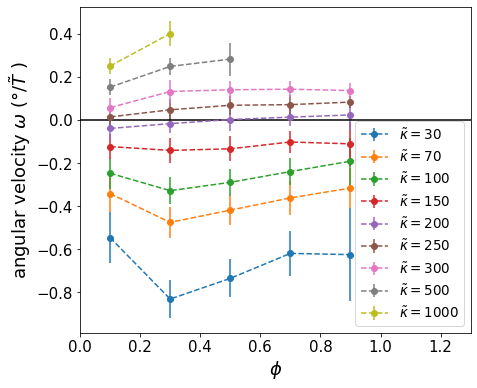

In [90]:
kappa = [30,70,100,150,200,250,300,500,1000]
BD = [0.1,0.3,0.5,0.7,0.9]
BD_plot = ['_B01_','_','_B05_','_B07_','_B09_']
fig, (ax1) = plt.subplots(1, figsize=(7,6))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']



end_index = [5,5,5, 5, 5,5,5,3,2]

for kp in range(len(kappa)):


    rate_array = np.zeros(0)
    std_array = np.zeros(0)

    for bd in range(len(BD[:end_index[kp]])):
        # print(kp)
        rate_of_rotation = np.zeros(0)

        for j in range(0,3):
            filename = "Ckappa" +BD_plot[bd]+str(kappa[kp]) + "Case" + str(j)
            time, angle, angular_velocity = rotation_rate1(filename)
            time1, cleaned_rates = remove_outliers_zscore(angular_velocity, time)
            rate_of_rotation = np.append(rate_of_rotation, cleaned_rates)

        rate_array = np.append(rate_array,np.mean(rate_of_rotation))
        # N = len(rate_of_rotation)
        std_array = np.append(std_array, np.std(rate_of_rotation))
        # print(kp,BD[bd],np.degrees(np.mean(rate_of_rotation)), np.degrees(np.std(rate_of_rotation)))
    
    # kappa_plot = kappa[begin_index[bd]:end_index[bd]+1]
    BD = BD[:end_index[kp]]
    plt.errorbar(BD, np.degrees(rate_array), yerr = np.degrees(std_array),fmt='o--', label = r'$\tilde{\kappa} = %s $'%( kappa[kp]), markerfacecolor = colors[kp])

    
plt.ylabel(r"angular velocity $\omega$ $ (\degree/ \tilde{T}$ )")

plt.xlabel(r'$\phi$')
# plt.xscale('log')
plt.xlim([0,1.3])
plt.axhline(y=0.0, color='black', linestyle='-')
plt.legend(loc = 'lower right',fontsize = 13.5)
# plt.savefig("Phi_kappa", dpi = 300, bbox_inches = "tight")
# plt.grid(True)